# Matplotlib tutorial

The goal of this tutorial is to host code that I will likely be using either in my research right now or later in the future. It will contain content on creating colormaps, colorbars, contour plots, animations and other data visualization related code.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

## Colormaps and Colorbars

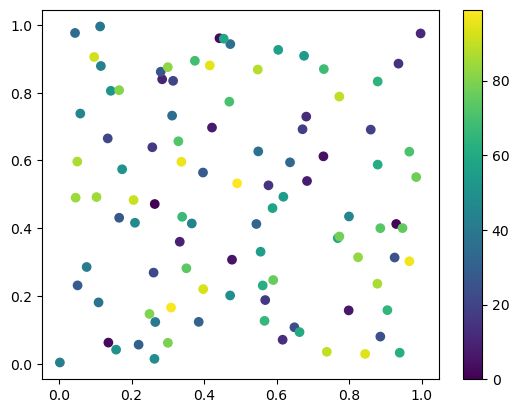

In [25]:
# Make a simple scatterplot with a colormap
# https://stackoverflow.com/questions/17682216/scatter-plot-and-color-mapping-in-python

x = np.random.rand(100)
y = np.random.rand(100)
t = np.arange(100)

plt.scatter(x, y, c=t) # c is the color
plt.colorbar()
plt.show()

In [42]:
np.random.random((20, 20)) * (col + 1)

array([[1.15398074, 0.78238084, 1.60255479, 1.08103406, 0.08790595,
        1.42765321, 1.85060445, 0.61315606, 0.19491376, 1.34297234,
        0.47446702, 0.65799929, 0.20876598, 0.98346849, 0.48330519,
        0.72490686, 0.89302003, 0.99838027, 0.89597537, 0.73732481],
       [0.38943771, 0.37960965, 0.69801015, 1.19125507, 0.28517904,
        1.23369193, 1.09065408, 0.00481709, 0.33830894, 0.44346678,
        0.5016602 , 0.67024443, 0.0607279 , 1.47758682, 1.31287413,
        0.26849486, 0.81141944, 0.42998796, 0.25342674, 0.47970343],
       [1.05133823, 1.02043012, 1.93672952, 0.31904184, 0.38617868,
        1.61136365, 0.15051102, 0.7832811 , 0.17760239, 1.29490338,
        0.8880176 , 0.0773763 , 0.31824487, 0.56214626, 1.37105571,
        0.09500179, 1.609068  , 1.28266693, 1.25102948, 1.59309883],
       [0.04454038, 1.72479012, 0.12438511, 1.40400363, 1.56250843,
        1.81944625, 1.23570663, 1.05982652, 0.74015122, 1.10170164,
        0.21976918, 0.37304069, 1.96886429, 0

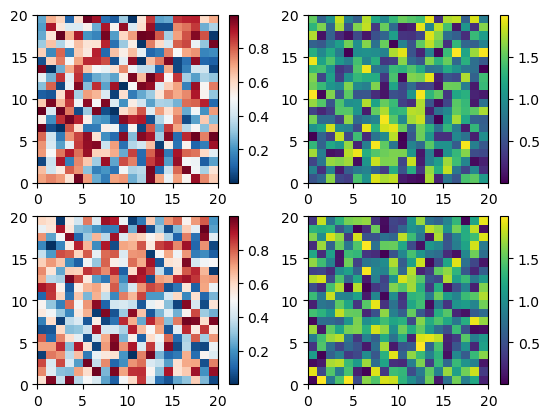

In [ ]:
## https://matplotlib.org/stable/users/explain/axes/colorbar_placement.html

np.random.seed(19680801)

fig, axs = plt.subplots(2, 2)
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1), # pcolormesh creates a pseudocolor plot with a non-regular rectangular grid
                            cmap=cmaps[col])
        fig.colorbar(pcm, ax=ax)

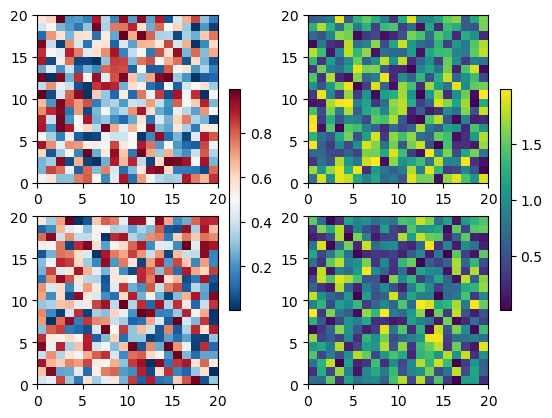

In [49]:
fig, axs = plt.subplots(2, 2)
cmaps = ['RdBu_r', 'viridis']
for col in range(2):
    for row in range(2):
        ax = axs[row, col]
        pcm = ax.pcolormesh(np.random.random((20, 20)) * (col + 1), # pcolormesh creates a pseudocolor plot with a non-regular rectangular grid
                            cmap=cmaps[col])
    fig.colorbar(pcm, ax=axs[:, col], shrink=0.6)

## Manual Placement of colorbars

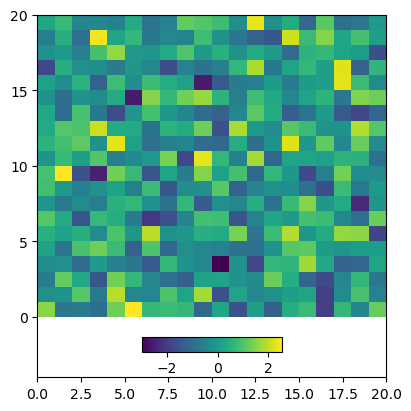

In [52]:
fig, ax = plt.subplots(layout='constrained', figsize=(4, 4))
pcm = ax.pcolormesh(np.random.randn(20, 20), cmap='viridis')
ax.set_ylim([-4, 20])
cax = ax.inset_axes([0.3, 0.07, 0.4, 0.04])
fig.colorbar(pcm, cax=cax, orientation='horizontal')

# Make a Zoomed in image in a figure

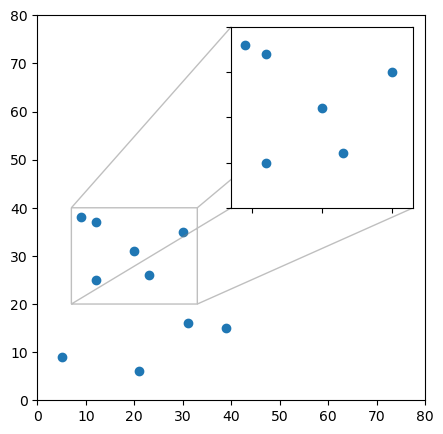

In [73]:
# Synthetic data
rng = np.random.default_rng(39)
x = rng.integers(0, 40, 10)
y = rng.integers(0, 40, 10)
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x, y)
ax.set_xlim(0, 80)
ax.set_ylim(0, 80)

# # Inset Axes
x1, x2, y1, y2 = 7, 33, 20, 40 # subregions of the original image
axins = ax.inset_axes(
    [0.5, 0.5, 0.47, 0.47],
    xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[]
)

axins.scatter(x, y)
# Code for making the connector lines
inset_indicator = ax.indicate_inset_zoom(axins)
inset_indicator.connectors[0].set_visible(True)
inset_indicator.connectors[1].set_visible(True)
inset_indicator.connectors[2].set_visible(True)
inset_indicator.connectors[3].set_visible(True)

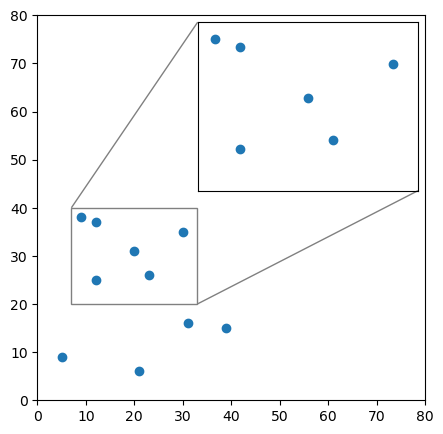

In [99]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

# Synthetic data
rng = np.random.default_rng(39)
x = rng.integers(0, 40, 10)
y = rng.integers(0, 40, 10)
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(x, y)
ax.set_xlim(0, 80)
ax.set_ylim(0, 80)

axins = zoomed_inset_axes(ax, 1.75, loc='upper right')
x1, x2, y1, y2 = 7, 33, 20, 40 # subregions of the original image
axins.scatter(x, y)
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([]) # Hide x-axis ticks for clarity
axins.set_yticks([]) # Hide y-axis ticks for clarity
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5",) # Connect main and inset axes
plt.show()

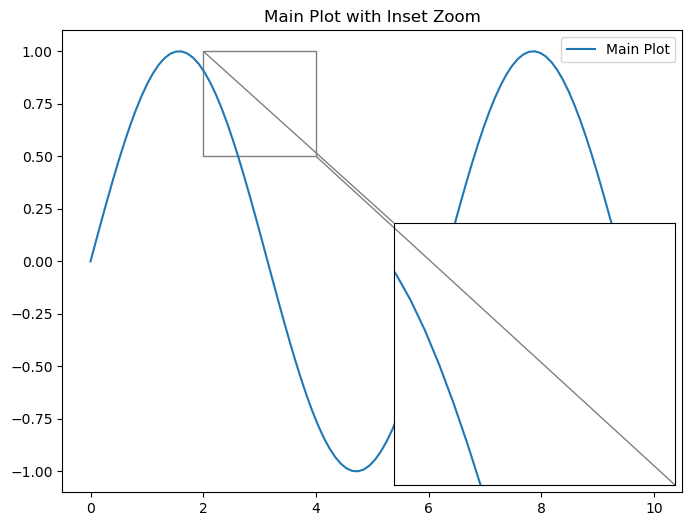

In [74]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset

fig, ax = plt.subplots(figsize=(8, 6))
# Plot your main data on 'ax'
x = np.linspace(0, 10, 100)
y = np.sin(x)
ax.plot(x, y, label='Main Plot')
ax.set_title('Main Plot with Inset Zoom')
ax.legend()

axins = zoomed_inset_axes(ax, 2.5, loc=4) # Zoom factor 2.5, located at lower right
# Define the region to zoom in on
x1, x2, y1, y2 = 2.0, 4.0, 0.5, 1.0 # Example coordinates for the zoom region
axins.plot(x, y) # Plot the same data
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticks([]) # Hide x-axis ticks for clarity
axins.set_yticks([]) # Hide y-axis ticks for clarity
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5") # Connect main and inset axes
plt.show()